In [127]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import collections
import pickle


SCORES_FOLDER_1_ = "../src/modeling/_1_one_user_learn_neighbours/scores"
TIME_WINDOWS = [2, 5, 15, 30, 60, 120, 180, None]
TIME_WINDOWS_2 = TIME_WINDOWS[:-1]  # plotable data


In [112]:
f1s = json.load(open(SCORES_FOLDER_1_ + '/f1s_testv_{}_svc.json'.format(2), 'r'))

In [113]:
def open_file(filename):
    with open(filename) as f:
        return json.load(f)

def get_values(mins, full=False):
    filename_test = SCORES_FOLDER_1_ + '/f1s_testv_{}_svc.json'.format(mins)
    if full:
        filename_train = SCORES_FOLDER_1_ + '/f1s_train_{}_svc.json'.format(mins)
        filename_pc_test = SCORES_FOLDER_1_ + '/pos_cases_testv_{}_svc.json'.format(mins)
        filename_pc_train = SCORES_FOLDER_1_ + '/pos_cases_train_{}_svc.json'.format(mins)
    
    test_v = open_file(filename_test)
    uids = list(test_v.keys())
    
    if full:
        files = [filename_test, filename_train, filename_pc_test, filename_pc_train]
    else:
        files = [filename_test]
    dicts = [ open_file(n) for n in files]
    
    dd = collections.defaultdict(list)
    for uid in uids:
        dd[uid].append(dicts[0][uid])  # f1s test
        if full:
            dd[uid].append(dicts[1][uid])  # f1s train
            dd[uid].append(dicts[2][uid])  # pos cases test
            dd[uid].append(dicts[3][uid])  # pos cases train
    
    if full:
        assert(all([len(v) == 4 for v in dd.values()]))
    else:
        assert(all([len(v) == 1 for v in dd.values()]))
    return dd

# data = get_values(2)
# df = pd.DataFrame.from_dict(data, orient='index', columns=['f1_test', 'f1_train', 'pos_cases_test', 'pos_cases_train'])

def build_df(list_times):
    cols = []
    data_t = collections.defaultdict(list)
    for t in list_times:
        cols.append("f1_{}".format(t))
        
        data = get_values(t, full=False)
        for uid, f1_test in data.items():
            data_t[uid].append(f1_test[0])

    df = pd.DataFrame.from_dict(data_t, orient='index', columns=cols)
    return df

df = build_df(TIME_WINDOWS)
df

,f1_2,f1_5,f1_15,f1_30,f1_60,f1_120,f1_180,f1_None
155612697,0.911340,0.914046,0.919149,0.918455,0.912580,0.906383,0.906383,0.918367
146114434,0.913386,0.383185,0.935484,0.943089,0.950820,0.964509,0.974790,0.929134
16311528,0.926108,0.928395,0.925000,0.929648,0.936709,0.935733,0.940568,0.921659
29622459,0.775726,0.775068,0.778302,0.776190,0.762712,0.747826,0.743363,0.769912
155359090,0.791111,0.790909,0.824074,0.819048,0.837438,0.881188,0.857143,0.895522
177767829,0.878924,0.894977,0.912442,0.918033,0.917647,0.926714,0.926714,0.836601
177222447,0.862385,0.864486,0.877108,0.885086,0.895000,0.908629,0.913265,0.853392
170780382,0.810976,0.818750,0.838710,0.842105,0.861017,0.873720,0.875862,0.857143
195846630,0.608392,0.632727,0.669261,0.674797,0.693333,0.733333,0.738916,0.749280
53062387,0.855172,0.863109,0.867925,0.876190,0.886199,0.897059,0.900990,0.919431


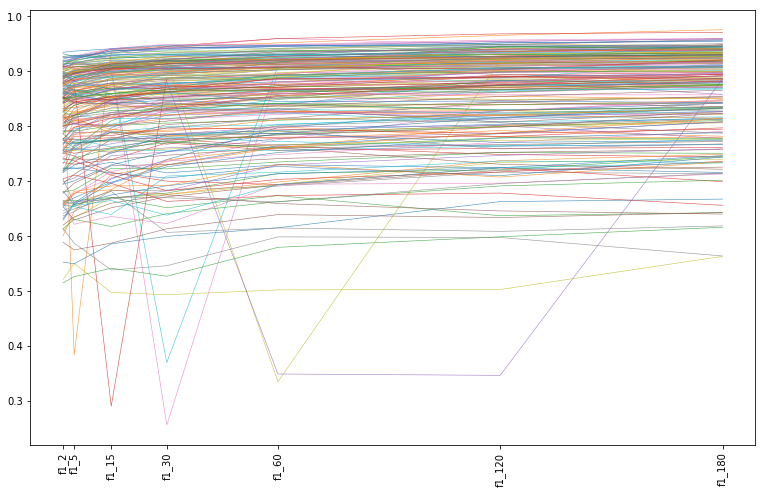

In [128]:
df_trasposed = df.transpose().rename(dict(zip(df.columns, TIME_WINDOWS)))
ax = df_trasposed.iloc[:-1, :].plot.line(legend=False, alpha=0.8, linewidth=0.6, figsize=(13, 8))
ax.set_xticklabels(df.columns, rotation=90)
_ = ax.set_xticks(TIME_WINDOWS_2)

# más o menos peinado... buena señal

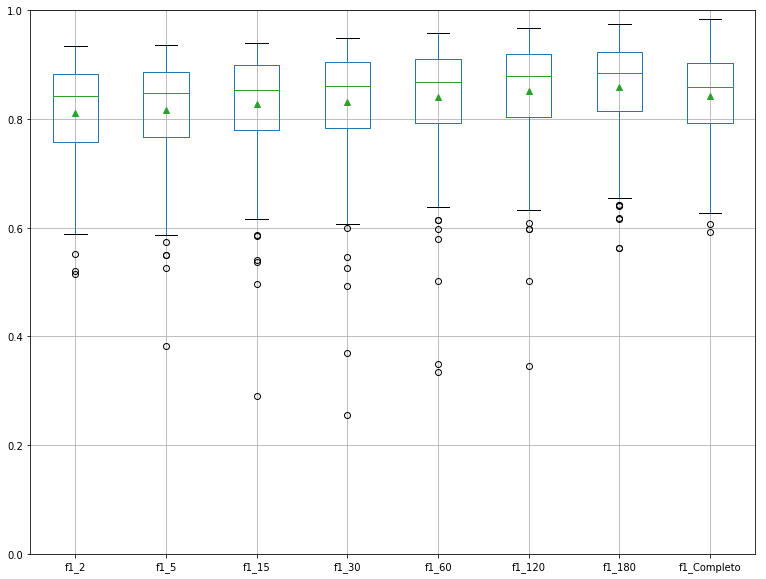

In [133]:
ax = df.boxplot(showmeans=True, figsize=(13,10))
ax.set_ylim(0, 1)
labels = list(df.columns)
labels[len(labels) - 1 ] = 'f1_Completo'
_ = ax.set_xticklabels(labels)

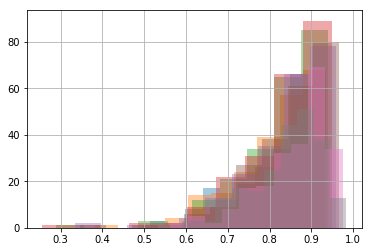

In [134]:
for col in df.columns:
    getattr(df,col).hist(alpha=0.4)
# ?

In [142]:
df_resume = df.describe()
df_resume

,f1_2,f1_5,f1_15,f1_30,f1_60,f1_120,f1_180,f1_None
count,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000
mean,0.811588,0.815826,0.826915,0.831007,0.841164,0.851819,0.859780,0.842334
std,0.090445,0.093994,0.095624,0.101876,0.096569,0.090726,0.082980,0.081347
min,0.514286,0.383185,0.289905,0.255732,0.334454,0.346090,0.562500,0.591479
25%,0.758629,0.766364,0.780240,0.783059,0.792818,0.804235,0.814006,0.791818
50%,0.842105,0.847775,0.853774,0.861190,0.867925,0.880000,0.884615,0.859599
75%,0.882014,0.886353,0.898957,0.905069,0.910245,0.919154,0.924162,0.903150
max,0.933638,0.935780,0.940510,0.948276,0.958991,0.967164,0.974790,0.983784


(0.7, 1)

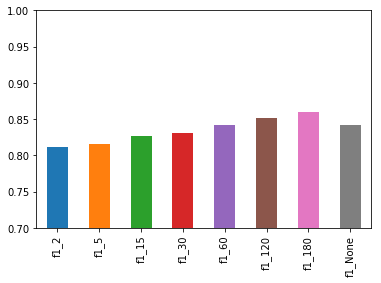

In [148]:
ax = df_resume.transpose()['mean'].plot(kind='bar')
ax.set_ylim(bottom=0.7, top=1)

In [94]:
(df.f1_test - df.f1_train).abs().describe()

count    223.000000
mean       0.016978
std        0.013641
min        0.000468
25%        0.006551
50%        0.013524
75%        0.024112
max        0.080090
dtype: float64

# Prueba de modelo de 2 minutos sobre las matrices X sin ventana de tiempo

In [97]:
filename = '../src/scores_2_mins_predicting'
scores = pickle.load(open(filename, 'rb'))

In [98]:
df = pd.DataFrame(scores).transpose()
# No es cierto que se hizo train sobre ese conjunto. Solo se predijo sobre ese conjunto.
# por qué da tan bien siendo que nunca vio esos datos?
# si vió esos tweets, pero no 
df

,f1s_testv,f1s_train,pos_cases_testv,pos_cases_train,precisions_testv,precisions_train,recalls_testv,recalls_train
155612697,0.874109,0.903183,235.0,1644.0,0.989247,0.980756,0.782979,0.836983
146114434,0.985075,0.970597,238.0,1663.0,1.000000,1.000000,0.970588,0.942874
16311528,0.863636,0.873149,199.0,1390.0,0.993464,0.983769,0.763819,0.784892
29622459,0.591640,0.624043,188.0,1313.0,0.747967,0.763216,0.489362,0.527799
155359090,0.581560,0.535417,96.0,671.0,0.911111,0.889273,0.427083,0.383010
177767829,0.926829,0.937974,220.0,1541.0,1.000000,1.000000,0.863636,0.883193
177222447,0.886010,0.871508,204.0,1430.0,0.939560,0.932271,0.838235,0.818182
170780382,0.787402,0.823995,143.0,1002.0,0.900901,0.951634,0.699301,0.726547
195846630,0.719512,0.753159,104.0,727.0,0.983333,0.971739,0.567308,0.614856
53062387,0.950392,0.949963,201.0,1406.0,1.000000,1.000000,0.905473,0.904694


(0, 1)

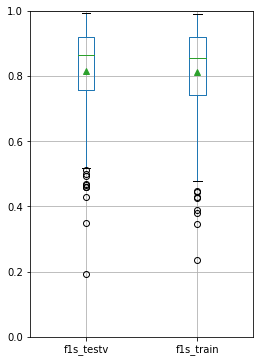

In [99]:
ax = df.boxplot(column=['f1s_testv', 'f1s_train'], showmeans=True, figsize=(4,6))
ax.set_ylim(0, 1)

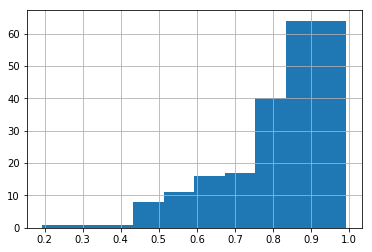

In [100]:
df.f1s_testv.hist()

In [101]:
df.describe()

,f1s_testv,f1s_train,pos_cases_testv,pos_cases_train,precisions_testv,precisions_train,recalls_testv,recalls_train
count,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000
mean,0.814955,0.812893,165.892377,1161.457399,0.939240,0.939648,0.730816,0.727076
std,0.143687,0.142387,50.921040,356.525420,0.096446,0.095957,0.171641,0.169859
min,0.193548,0.236476,46.000000,321.000000,0.253521,0.313525,0.156522,0.189826
25%,0.758105,0.741684,132.000000,922.500000,0.923527,0.928274,0.620703,0.614278
50%,0.864198,0.855434,167.000000,1166.000000,0.974843,0.975052,0.774834,0.769870
75%,0.920632,0.918975,208.000000,1455.500000,1.000000,0.996491,0.863149,0.854541
max,0.992701,0.991322,271.000000,1901.000000,1.000000,1.000000,0.985507,0.982794
